# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
import importlib

import nlp_extractors

importlib.reload(nlp_extractors)

[nltk_data] Downloading package punkt to /home/bruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']


In [10]:
np.__config__.show()

blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/bruno/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/bruno/anaconda3/include']


In [3]:
db_filename = 'DisasterResponse.db'
db_tablename = 'messages'

In [4]:
labels = [ 
 'related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report'
]

In [5]:
# load data from database
engine = create_engine(f'sqlite:///../data/{db_filename}')
df = pd.read_sql_table(db_tablename, engine)
X = df.message
Y = df[labels]

['child_alone']

In [13]:
dir(df[labels].sum())

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__p

In [7]:
df.columns[4:]

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

### 2. Write a tokenization function to process your text data

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y.drop(['child_alone'], axis = 1), random_state = 42)
labels.pop(labels.index('child_alone'))

'child_alone'

In [30]:
from sklearn.linear_model import LogisticRegression

# labels.pop(labels.index('child_alone'))

model = RandomForestClassifier() # LogisticRegression(multi_class = 'ovr', verbose = 1, solver = 'liblinear', random_state = 42, penalty = 'l2', max_iter = 1000)

pipeline = Pipeline([
        ('features', FeatureUnion([
            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer(tokenizer=nlp_extractors.tokenize)),
                ('tfidf', TfidfTransformer())
            ])),
            ('numeric_digit', nlp_extractors.NumericDigitExtractor()),
            ('question', nlp_extractors.QuestionExtractor())
        ])),
    
        ('classifier', MultiOutputClassifier(model)) 
    ])

In [31]:
pipeline.fit(X_train, y_train)

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/bruno/anaconda3/lib/python3.7/site-package

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('vect',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                                  encoding='utf-8',
                                                                                  input='content',
                                                                                  low

In [32]:
y_pred = pipeline.predict(X_test)

In [35]:
import pickle

pickle.dump(pipeline, open('model.pkl', 'wb'))

In [33]:
def display_results(column_name, column_index, y_test, y_pred):
    
    curr_y_test = y_test[[column_name]]
    curr_y_pred = y_pred[:, column_index]
    
    labels = [0,1] # np.unique(curr_y_test)
    confusion_mat = confusion_matrix(curr_y_test, curr_y_pred, labels=labels)
    accuracy = (curr_y_test[column_name] == curr_y_pred).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)
    
for idx, name in enumerate(list(y_test.columns)):
    
    print(f'Category: {name} at index {idx}')
    
    display_results(name, idx, y_test, y_pred)
    
    print('\n\n')

Category: related at index 0
Labels: [0, 1]
Confusion Matrix:
 [[ 710  829]
 [ 474 4533]]
Accuracy: 0.8009471432936144



Category: request at index 1
Labels: [0, 1]
Confusion Matrix:
 [[5298  125]
 [ 650  473]]
Accuracy: 0.8816070882981973



Category: offer at index 2
Labels: [0, 1]
Confusion Matrix:
 [[6512    0]
 [  34    0]]
Accuracy: 0.9948059883898565



Category: aid_related at index 3
Labels: [0, 1]
Confusion Matrix:
 [[3266  518]
 [1133 1629]]
Accuracy: 0.7477849068133211



Category: medical_help at index 4
Labels: [0, 1]
Confusion Matrix:
 [[5988   28]
 [ 486   44]]
Accuracy: 0.9214787656584174



Category: medical_products at index 5
Labels: [0, 1]
Confusion Matrix:
 [[6215   10]
 [ 298   23]]
Accuracy: 0.9529483654139933



Category: search_and_rescue at index 6
Labels: [0, 1]
Confusion Matrix:
 [[6377    2]
 [ 162    5]]
Accuracy: 0.974946532233425



Category: security at index 7
Labels: [0, 1]
Confusion Matrix:
 [[6415    7]
 [ 122    2]]
Accuracy: 0.9802933088909258



### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [51]:
df_categories = df[labels].sum().to_frame().reset_index()
df_categories.columns = ['category', 'total']
df_categories

,category,total
0,related,20065
1,request,4474
2,offer,117
3,aid_related,10859
4,medical_help,2083
5,medical_products,1312
6,search_and_rescue,724
7,security,471
8,military,860
9,water,1672


In [44]:
from sklearn.metrics import f1_score

f1_score(y_true=y_test, y_pred=y_pred, average='micro')

0.6059799860930556

In [34]:
print(classification_report(y_test.values, y_pred, target_names=labels, output_dict = False))

                        precision    recall  f1-score   support

               related       0.85      0.91      0.87      5007
               request       0.79      0.42      0.55      1123
                 offer       0.00      0.00      0.00        34
           aid_related       0.76      0.59      0.66      2762
          medical_help       0.61      0.08      0.15       530
      medical_products       0.70      0.07      0.13       321
     search_and_rescue       0.71      0.03      0.06       167
              security       0.22      0.02      0.03       124
              military       0.55      0.05      0.09       233
                 water       0.84      0.29      0.43       432
                  food       0.84      0.46      0.59       742
               shelter       0.82      0.34      0.48       576
              clothing       0.91      0.10      0.19        97
                 money       0.62      0.03      0.06       160
        missing_people       1.00      

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [13]:
print(classification_report(y_test.values, y_pred, target_names=labels, output_dict = False))

                        precision    recall  f1-score   support

               related       0.84      0.95      0.89      5007
               request       0.83      0.51      0.63      1123
                 offer       0.00      0.00      0.00        34
           aid_related       0.78      0.65      0.71      2762
          medical_help       0.69      0.16      0.26       530
      medical_products       0.71      0.17      0.27       321
     search_and_rescue       0.94      0.09      0.16       167
              security       0.00      0.00      0.00       124
              military       0.73      0.12      0.20       233
                 water       0.80      0.45      0.58       432
                  food       0.86      0.59      0.70       742
               shelter       0.83      0.43      0.56       576
              clothing       0.79      0.15      0.26        97
                 money       0.82      0.09      0.16       160
        missing_people       1.00      

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [15]:
report = classification_report(y_test.values, y_pred, target_names=labels, output_dict = True)

In [14]:
def map_with_key(key):
    result = report.get(key)
    result['category'] = key
    return result

In [16]:
df_metrics = pd.DataFrame(list(map(map_with_key, labels)))
df_metrics.head(20)

,precision,recall,f1-score,support,category
0,0.842189,0.952866,0.894115,5007,related
1,0.831150,0.508459,0.630939,1123,request
2,0.000000,0.000000,0.000000,34,offer
3,0.783290,0.651702,0.711462,2762,aid_related
4,0.688525,0.158491,0.257669,530,medical_help
5,0.706667,0.165109,0.267677,321,medical_products
6,0.937500,0.089820,0.163934,167,search_and_rescue
7,0.000000,0.000000,0.000000,124,security
8,0.729730,0.115880,0.200000,233,military
9,0.799180,0.451389,0.576923,432,water


In [18]:
df_metrics.to_csv('../models/linear_model_metrics.csv', index = False)

In [28]:
df_metrics = pd.read_csv('linear_model_metrics.csv')
df_metrics.sort_values(by = ['f1-score', 'recall', 'precision' ], ascending = False)

,precision,recall,f1-score,support,category
0,0.842189,0.952866,0.894115,5007,related
31,0.915033,0.668790,0.772769,628,earthquake
27,0.863064,0.651761,0.742675,1789,weather_related
3,0.783290,0.651702,0.711462,2762,aid_related
10,0.858546,0.588949,0.698641,742,food
1,0.831150,0.508459,0.630939,1123,request
9,0.799180,0.451389,0.576923,432,water
11,0.826087,0.428819,0.564571,576,shelter
29,0.762918,0.444248,0.561521,565,storm
28,0.897436,0.406977,0.560000,516,floods


In [21]:
'precision'.title()

'Precision'

In [26]:
data_metrics = []
for metric in ['precision', 'recall', 'f1-score']:
    data_metrics.append({
        'name' : metric.title(),
        'type' : 'bar',
        'x' : list(df_metrics.category),
        'y' : list(map(lambda x: np.around(x, 2), df_metrics[metric]))
    })
data_metrics

[{'name': 'Precision',
  'type': 'bar',
  'x': [0.84,
   0.83,
   0.0,
   0.78,
   0.69,
   0.71,
   0.94,
   0.0,
   0.73,
   0.8,
   0.86,
   0.83,
   0.79,
   0.82,
   1.0,
   0.67,
   0.83,
   0.63,
   0.59,
   0.79,
   0.76,
   0.73,
   0.0,
   0.0,
   0.0,
   0.0,
   0.43,
   0.86,
   0.9,
   0.76,
   1.0,
   0.92,
   0.71,
   0.48,
   0.74]},
 {'name': 'Recall',
  'type': 'bar',
  'x': [0.95,
   0.51,
   0.0,
   0.65,
   0.16,
   0.17,
   0.09,
   0.0,
   0.12,
   0.45,
   0.59,
   0.43,
   0.15,
   0.09,
   0.01,
   0.06,
   0.28,
   0.12,
   0.02,
   0.11,
   0.21,
   0.12,
   0.0,
   0.0,
   0.0,
   0.0,
   0.01,
   0.65,
   0.41,
   0.44,
   0.01,
   0.67,
   0.11,
   0.03,
   0.4]},
 {'name': 'F1-Score',
  'type': 'bar',
  'x': [0.89,
   0.63,
   0.0,
   0.71,
   0.26,
   0.27,
   0.16,
   0.0,
   0.2,
   0.58,
   0.7,
   0.56,
   0.26,
   0.16,
   0.03,
   0.1,
   0.41,
   0.2,
   0.05,
   0.19,
   0.33,
   0.21,
   0.0,
   0.0,
   0.0,
   0.0,
   0.02,
   0.74,
   0.56,
 

In [20]:
df_metrics

,precision,recall,f1-score,support,category
0,0.842189,0.952866,0.894115,5007,related
1,0.831150,0.508459,0.630939,1123,request
2,0.000000,0.000000,0.000000,34,offer
3,0.783290,0.651702,0.711462,2762,aid_related
4,0.688525,0.158491,0.257669,530,medical_help
5,0.706667,0.165109,0.267677,321,medical_products
6,0.937500,0.089820,0.163934,167,search_and_rescue
7,0.000000,0.000000,0.000000,124,security
8,0.729730,0.115880,0.200000,233,military
9,0.799180,0.451389,0.576923,432,water


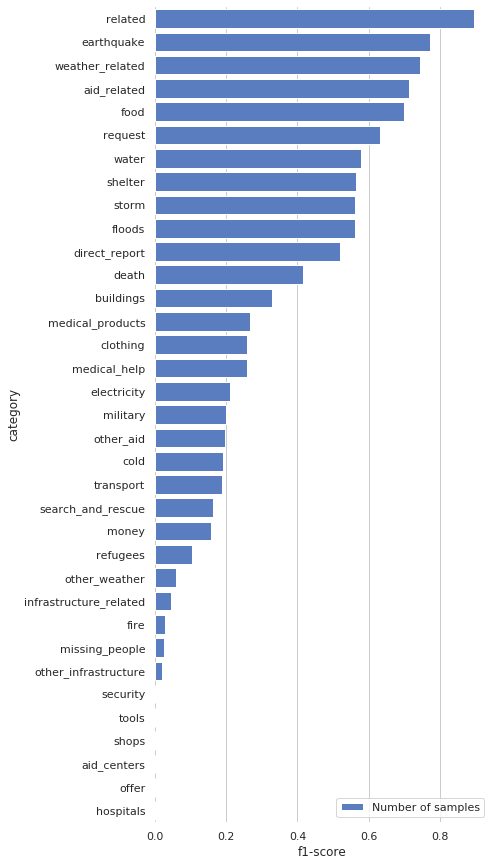

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
 
f, ax = plt.subplots(figsize=(6, 15))
 
sns.set_color_codes("muted")
sns.barplot(x="f1-score", y="category", data=df_metrics.sort_values(by = 'f1-score', ascending = False), label="Number of samples", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)

sns.despine(left=True, bottom=True)

### 6. Improve your model
Use grid search to find better parameters. 

In [8]:
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import PassiveAggressiveClassifier

model = LogisticRegression(multi_class = 'ovr', verbose = 1, solver = 'liblinear', random_state = 42, penalty = 'l2', max_iter = 1000)

pipeline = Pipeline([
        ('features', FeatureUnion([
            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer(tokenizer=nlp_extractors.tokenize)),
                ('tfidf', TfidfTransformer())
            ])),
            ('numeric_digit', nlp_extractors.NumericDigitExtractor()),
            ('question', nlp_extractors.QuestionExtractor())
        ])),
    
        ('classifier', MultiOutputClassifier(model)) 
    ])

In [9]:
parameters = {
    'features__text_pipeline__vect__ngram_range': ((1, 1), (1, 2)),
    'features__text_pipeline__vect__max_df': (0.5, 0.75, 1.0),
    'features__text_pipeline__vect__max_features': (None, 5000, 10000),
    'features__text_pipeline__tfidf__use_idf': (True, False),
    'features__text_pipeline__tfidf__norm': ('l1', 'l2'),
    #'classifier__estimator__n_estimators': [50, 100, 200],
    #'classifier__estimator__C': [5, 10],
    #'classifier__estimator__penalty' : ['l1', 'l2']
}

cv = GridSearchCV(pipeline, param_grid = parameters, n_jobs = -1, verbose = 10)

In [13]:
cv.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 39.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 52.3min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 65.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 78.7min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 106.2min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 119.3min
[Parallel(n_jobs=-1)]: Done 149 tasks    

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('text_pipeline',
                                                                        Pipeline(memory=None,
                                                                                 steps=[('vect',
                                                                                         CountVectorizer(analyzer='word',
                                                                                                         binary=False,
                                                                                                         decode_error='strict',
                                                                                                         dtype=<class 'numpy.int64'

In [190]:
from sklearn.utils import parallel_backend as sk_pb
from joblib import parallel_backend as jl_pb

for lib, ctx, back in [("joblib", jl_pb, "multiprocessing"),
                       ("sklearn", sk_pb, "multiprocessing"),
                       ("joblib", jl_pb, "loky"),
                       ("sklearn", sk_pb, "loky")]:
    with ctx(backend=back):
        status = "OK"
        try:
            cv.fit(X_train, y_train)
        except Exception as e:
            status = f"{e}"
            # raise
    # end with

    print(f"backend {lib}-{back}: {status}")

[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_featur

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 16 concurrent workers.


[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_featur

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.260, total=12.2min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1), score=0.258, total=13.1min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.2min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.265, total=13.3min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2), score=0.244, total=18.9min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.269, total=12.8min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.265, total=14.3min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed: 30.5min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.261, total=17.5min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.259, total=14.4min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.259, total=15.3min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.257, total=16.5min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed: 47.1min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.265, total=16.7min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1), score=0.258, total=14.6min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.264, total=14.7min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.261, total=16.7min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.268, total=16.6min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 73.5min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.259, total=15.2min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 94.4min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2), score=0.280, total=13.8min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 114.0min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1), score=0.287, total=15.2min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 131.9min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.286, total=13.8min
[CV] classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 148.1min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.287, total=13.5min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLine

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.290, total=13.5min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=5, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.283, total=13.8min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.229, total=14.0min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed: 171.6min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.233, total=17.7min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.232, total=16.0min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibL

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.234, total=14.3min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1), score=0.240, total=17.6min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.228, total=16.8min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][Lib

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.229, total=19.9min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][Lib

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.230, total=19.1min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.232, total=18.3min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 214.1min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.233, total=17.8min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibL

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.234, total=18.2min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 


/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1), score=0.237, total=88.5min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.228, total=21.0min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLin

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1), score=0.237, total=107.7min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][Lib

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=5000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.233, total=18.8min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2), score=0.224, total=149.2min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibL

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.233, total=17.5min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 1) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 312.2min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l1, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.234, total=18.4min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLi

[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 354.8min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.5, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 1), score=0.279, total=18.1min
[CV] classifier__estimator__C=10, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=0.75, features__text_pipeline__vect__max_features=None, features__text_pipeline__vect__ngram_range=(1, 2) 
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibL

[Parallel(n_jobs=-1)]: Done 207 out of 216 | elapsed: 415.5min remaining: 18.1min


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][CV]  classifier__estimator__C=10, classifier__estimator__penalty=l2, features__text_pipeline__vect__max_df=1.0, features__text_pipeline__vect__max_features=10000, features__text_pipeline__vect__ngram_range=(1, 2), score=0.280, total=12.7min
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 501.7min finished
Process ForkPoolWorker-117:
Process ForkPoolWorker-116:
Process ForkPoolWorker-111:
Process ForkPoolWorker-112:
Process ForkPoolWorker-113:
Process ForkPoolWorker-107:
Process ForkPoolWorker-115:
Process ForkPoolWorker-108:
Process ForkPoolWorker-122:
Process ForkPoolWorker-120:
Process ForkPoolWorker-110:
Process ForkPoolWorker-119:
Process ForkPoolWorker-118:
Process ForkPoolWorker-114:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-121:
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bruno/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most 

KeyboardInterrupt: 

In [14]:
cv

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('text_pipeline',
                                                                        Pipeline(memory=None,
                                                                                 steps=[('vect',
                                                                                         CountVectorizer(analyzer='word',
                                                                                                         binary=False,
                                                                                                         decode_error='strict',
                                                                                                         dtype=<class 'numpy.int64'

In [15]:
cv.best_params_

{'features__text_pipeline__tfidf__norm': 'l2',
 'features__text_pipeline__tfidf__use_idf': False,
 'features__text_pipeline__vect__max_df': 0.5,
 'features__text_pipeline__vect__max_features': 5000,
 'features__text_pipeline__vect__ngram_range': (1, 2)}

In [16]:
cv.best_estimator_

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('vect',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                                  encoding='utf-8',
                                                                                  input='content',
                                                                                  low

In [17]:
cv.best_estimator_.fit(X_train, y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text_pipeline',
                                                 Pipeline(memory=None,
                                                          steps=[('vect',
                                                                  CountVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.int64'>,
                                                                                  encoding='utf-8',
                                                                                  input='content',
                                                                                  low

In [18]:
y_pred = cv.best_estimator_.predict(X_test) 

In [19]:
print(classification_report(y_test.values, y_pred, target_names=labels, output_dict = False))

                        precision    recall  f1-score   support

               related       0.85      0.94      0.89      5007
               request       0.84      0.53      0.65      1123
                 offer       0.00      0.00      0.00        34
           aid_related       0.79      0.65      0.72      2762
          medical_help       0.69      0.17      0.28       530
      medical_products       0.78      0.19      0.31       321
     search_and_rescue       0.88      0.09      0.16       167
              security       0.00      0.00      0.00       124
              military       0.73      0.15      0.25       233
                 water       0.80      0.54      0.64       432
                  food       0.85      0.65      0.74       742
               shelter       0.84      0.46      0.59       576
              clothing       0.83      0.21      0.33        97
                 money       0.73      0.07      0.13       160
        missing_people       1.00      

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


#### Testing with translated dataset

In [16]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer(tokenizer=tokenize)),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators = 10)))
])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [18]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function toke...
                 MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                   

In [19]:
y_pred = pipeline.predict(X_test)

In [20]:
print(classification_report(y_test.values, y_pred, target_names=labels, output_dict = False))

                        precision    recall  f1-score   support

               related       0.82      0.94      0.87      5003
               request       0.82      0.37      0.51      1114
                 offer       0.00      0.00      0.00        32
           aid_related       0.73      0.54      0.62      2691
          medical_help       0.61      0.07      0.13       538
      medical_products       0.79      0.07      0.13       331
     search_and_rescue       0.67      0.01      0.02       180
              security       0.00      0.00      0.00       119
              military       0.65      0.06      0.11       212
           child_alone       0.00      0.00      0.00         0
                 water       0.82      0.26      0.40       404
                  food       0.86      0.43      0.57       741
               shelter       0.83      0.26      0.40       596
              clothing       0.71      0.05      0.09       107
                 money       1.00      

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [ ]:
{
    'classifier__estimator__min_samples_split': 4,
    'classifier__estimator__n_estimators': 100,
    'features__text_pipeline__vect__max_df': 0.5,
    'features__text_pipeline__vect__max_features': 10000,
    'features__text_pipeline__vect__ngram_range': (1, 2)
}

In [22]:
pipeline = Pipeline([
        ('vectorizer', CountVectorizer(tokenizer=tokenize, max_df = 0.5, max_features = 10000, ngram_range = (1, 2))),
        ('tfidf', TfidfTransformer()),
        ('classifier', MultiOutputClassifier(RandomForestClassifier(n_estimators = 100, min_samples_split = 4)))
])

In [23]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=10000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tok...
                 MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                   

In [25]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test.values, y_pred, target_names=labels, output_dict = False))

                        precision    recall  f1-score   support

               related       0.82      0.97      0.89      5003
               request       0.84      0.49      0.62      1114
                 offer       0.00      0.00      0.00        32
           aid_related       0.76      0.66      0.71      2691
          medical_help       0.62      0.11      0.18       538
      medical_products       0.82      0.20      0.32       331
     search_and_rescue       0.73      0.12      0.21       180
              security       0.00      0.00      0.00       119
              military       0.65      0.06      0.11       212
           child_alone       0.00      0.00      0.00         0
                 water       0.81      0.57      0.67       404
                  food       0.83      0.71      0.76       741
               shelter       0.82      0.49      0.61       596
              clothing       0.81      0.23      0.36       107
                 money       1.00      

/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/bruno/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)
